In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## All experiments

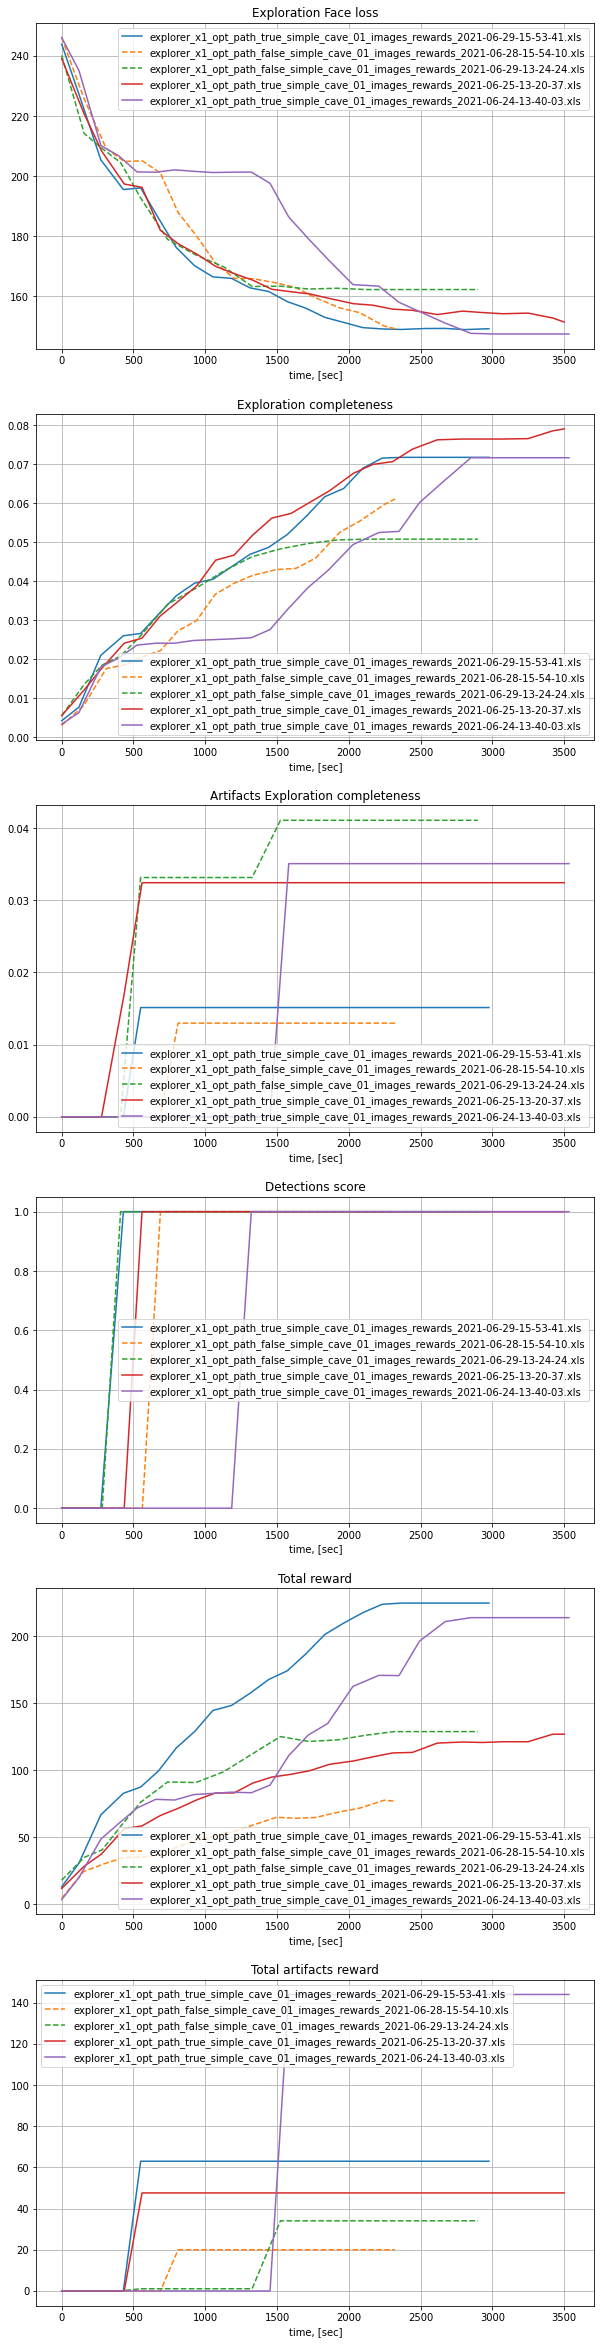

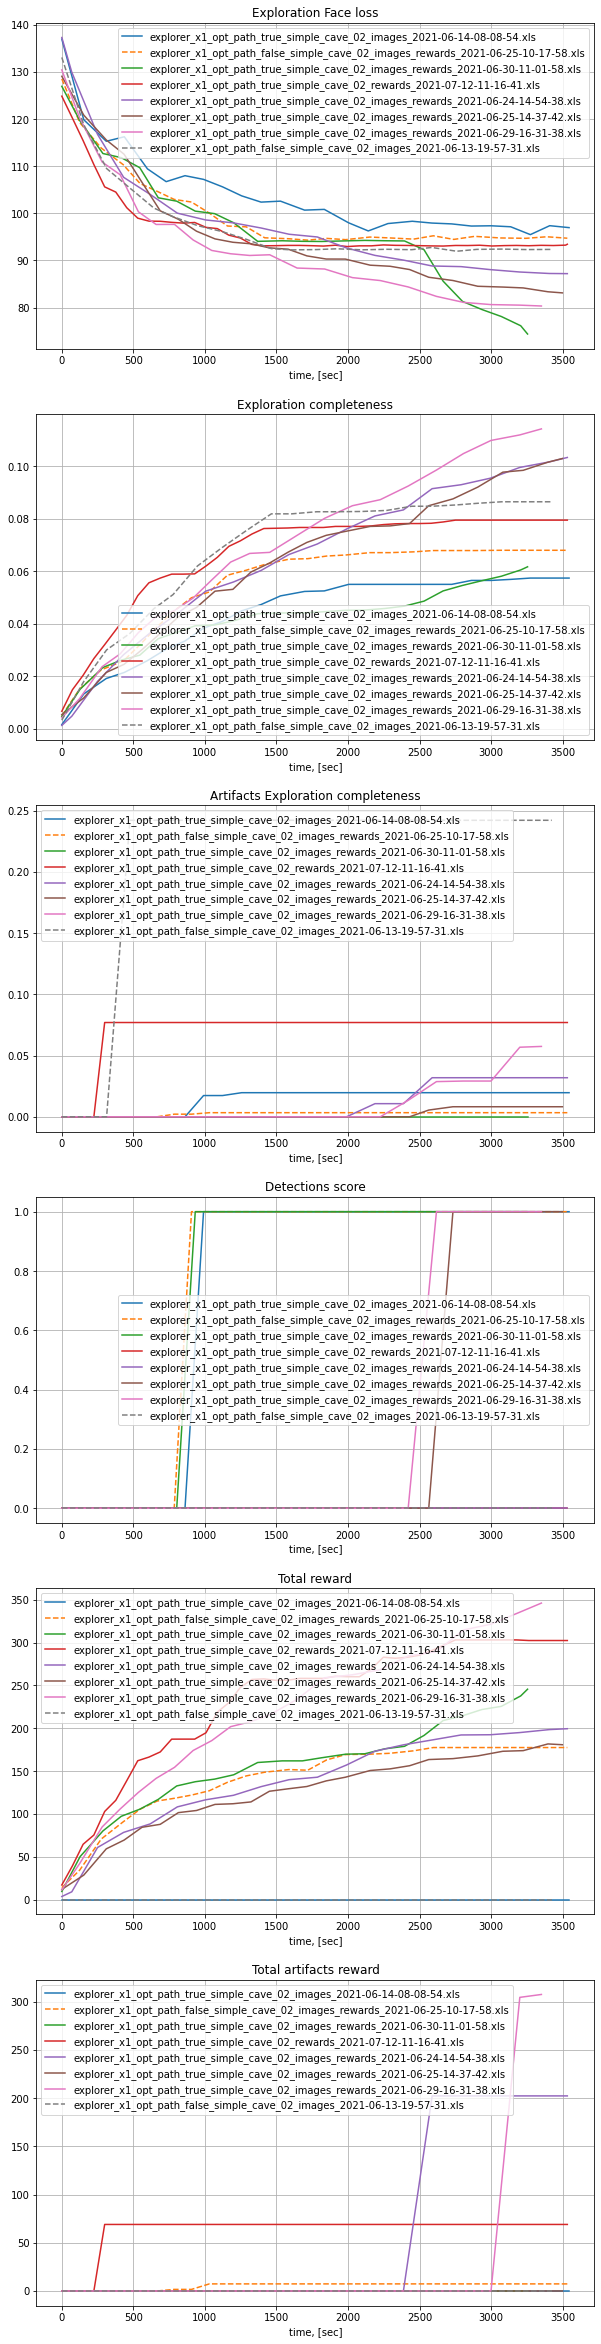

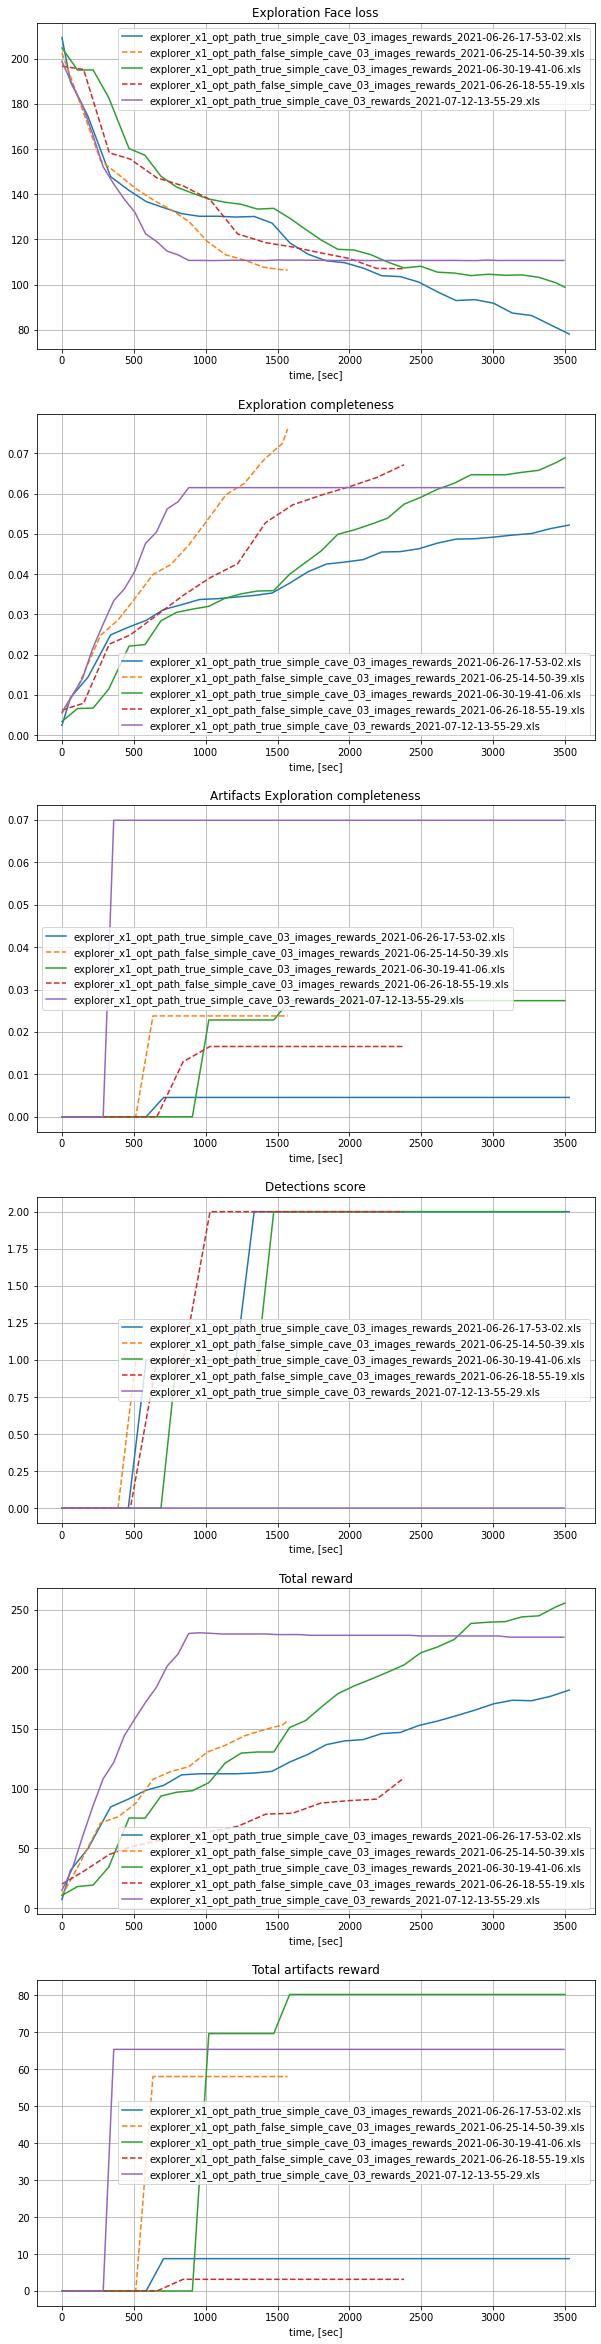

In [2]:
common_metrics = [
            "Exploration Face loss",
#             "Exploration Edge loss",
#             "Exploration Chamfer loss",
#             "Map Face loss",
#             "Map Edge loss",
#             "Map Chamfer loss",
            "Exploration completeness",
            "Artifacts Exploration completeness",
            "Detections score",
#             "N of constructed points"
            "Total reward",
            "Total artifacts reward"
          ]

worlds = ["simple_cave_01", "simple_cave_02", "simple_cave_03"]
# worlds = ["simple_cave_02"]

# paths = ['../data/bags/mapping_eval/metrics/']
paths = ['../data/bags/mapping_eval/']

for world in worlds:
    plt.figure(figsize=(10, 7*len(common_metrics)*len(paths)))
    plt.title(f"World: {world}")
    for i, metric in enumerate(common_metrics):
        plt.subplot(len(common_metrics)*len(paths), 1, i+1)
        plt.title(metric)
        for path in paths:
            xls_files = [file for file in os.listdir(path) if 'xls' in file and world in file]
            for file in xls_files:
                data = pd.read_excel(os.path.join(path, file))
                if metric in data and np.max(data['Exploration completeness']) > 0.05:
                    ls = 'solid' if 'true' in file else 'dashed'
                    plt.plot(data['Time stamp'] - data['Time stamp'][0], data[metric], linestyle=ls, label=file)
        plt.grid()
        plt.xlabel('time, [sec]')
        plt.legend();

In [3]:
data.head()

,Time stamp,Exploration Face loss,Exploration Edge loss,Exploration Chamfer loss,Exploration completeness,Map Face loss,Map Edge loss,Map Chamfer loss,Artifacts Exploration completeness,Detections score,N of constructed points,Total reward,Total artifacts reward
0,89.001422,198.877930,199.082504,170.134506,0.0057,0.383321,0.611716,1.489288,0.0,0,10000,14.934060,0.0
1,160.180928,188.612610,188.813385,161.646881,0.0098,0.285231,0.483604,1.446009,0.0,0,10000,32.735847,0.0
2,231.495288,179.458344,179.657318,154.081573,0.0140,0.238994,0.420408,1.419284,0.0,0,10000,59.530998,0.0
3,302.696746,166.593689,166.793793,143.770721,0.0215,0.190056,0.361036,1.410804,0.0,0,10000,84.817307,0.0
4,376.073926,152.116913,152.309006,131.350769,0.0276,0.156885,0.311533,1.416406,0.0,0,10000,108.310059,0.0
